<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-2-Regression-1/blob/master/PROPHET_evalutating_crossvalidating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab  import files
files.upload()

Saving googlesearchgodallaartificial.csv to googlesearchgodallaartificial (3).csv


{'googlesearchgodallaartificial.csv': b'Category: All categories\n\nMonth,Allah: (Worldwide),Artificial intelligence: (Worldwide),God: (Worldwide)\n2004-01,3,13,42\n2004-02,3,14,43\n2004-03,3,14,44\n2004-04,3,14,44\n2004-05,3,14,43\n2004-06,3,12,39\n2004-07,3,13,37\n2004-08,3,13,39\n2004-09,3,14,44\n2004-10,3,13,46\n2004-11,3,14,45\n2004-12,3,13,43\n2005-01,3,12,43\n2005-02,3,12,43\n2005-03,3,12,44\n2005-04,3,12,47\n2005-05,3,12,45\n2005-06,3,11,41\n2005-07,3,10,40\n2005-08,3,11,40\n2005-09,4,11,46\n2005-10,5,12,49\n2005-11,4,11,48\n2005-12,4,11,48\n2006-01,4,10,46\n2006-02,6,10,46\n2006-03,5,11,47\n2006-04,5,11,46\n2006-05,4,10,46\n2006-06,4,11,42\n2006-07,4,10,39\n2006-08,4,10,40\n2006-09,4,12,42\n2006-10,5,11,45\n2006-11,4,11,44\n2006-12,5,10,42\n2007-01,4,10,42\n2007-02,4,10,43\n2007-03,4,11,41\n2007-04,4,10,43\n2007-05,4,10,43\n2007-06,4,10,42\n2007-07,4,10,41\n2007-08,4,10,41\n2007-09,5,10,49\n2007-10,5,10,48\n2007-11,5,10,47\n2007-12,5,10,47\n2008-01,5,10,45\n2008-02,5,10,45\n20

In [0]:
import pandas as pd
df = pd.read_csv('googlesearchgodallaartificial.csv',skiprows=1)
df.shape

(185, 4)

#Interest over time
Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

In [0]:
df.head()

,Month,Allah: (Worldwide),Artificial intelligence: (Worldwide),God: (Worldwide)
0,2004-01,3,13,42
1,2004-02,3,14,43
2,2004-03,3,14,44
3,2004-04,3,14,44
4,2004-05,3,14,43


In [0]:
df.columns.tolist()

['Month',
 'Allah: (Worldwide)',
 'Artificial intelligence: (Worldwide)',
 'God: (Worldwide)']

In [0]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

In [0]:
df.head()

,Allah: (Worldwide),Artificial intelligence: (Worldwide),God: (Worldwide)
Month,,,
2004-01-01,3,13,42
2004-02-01,3,14,43
2004-03-01,3,14,44
2004-04-01,3,14,44
2004-05-01,3,14,43


In [0]:
df.tail()

,Allah: (Worldwide),Artificial intelligence: (Worldwide),God: (Worldwide)
Month,,,
2019-01-01,15,14,91
2019-02-01,16,15,92
2019-03-01,16,15,94
2019-04-01,15,16,92
2019-05-01,18,15,92


In [0]:
import matplotlib.pyplot as plt

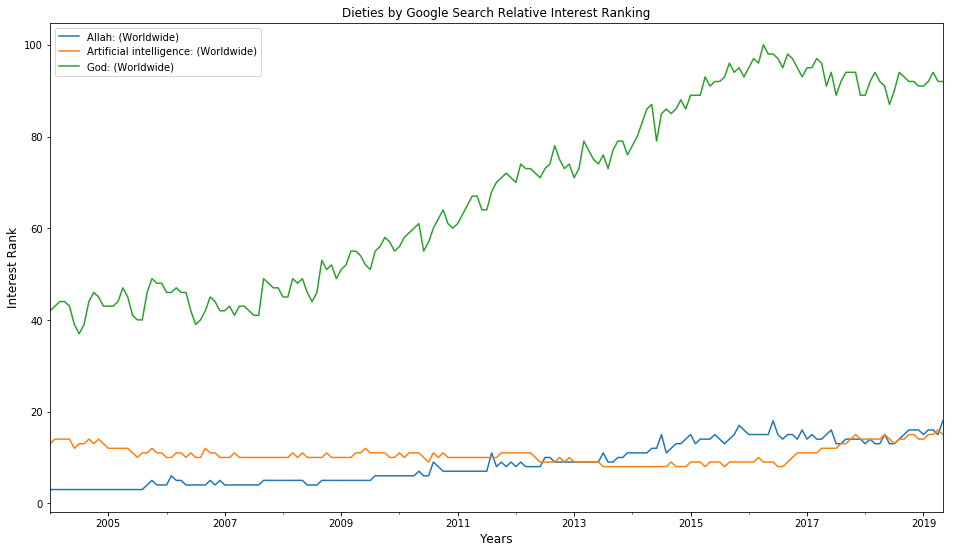

In [0]:
#add in dates to end of df to get empty space for prediction
df.plot(figsize=(16,9));
plt.title('Dieties by Google Search Relative Interest Ranking')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Interest Rank', fontsize=12);

In [0]:
#average method of forecasting
#How to take the average rate of change and apply to previous days???
df['God: (Worldwide)'].mean()

68.0

In [0]:
df['God Mean Baseline'] = df['God: (Worldwide)'].mean()
df['Allah Mean Baseline'] = df['Allah: (Worldwide)'].mean()
df['A.i. Mean Baseline'] = df['Artificial intelligence: (Worldwide)'].mean()



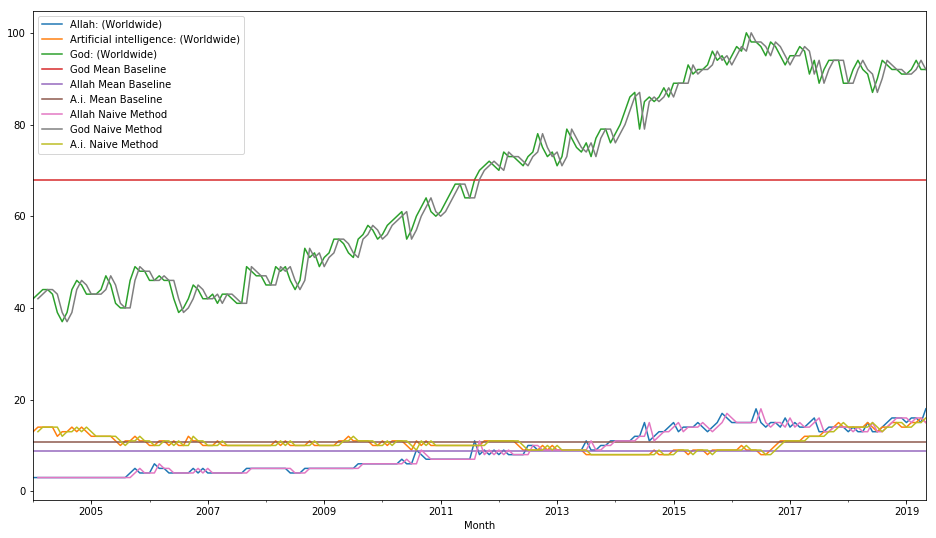

In [0]:
#naive method(last observation)
#shifts number by one day and fills from the last day a flat line
df['Allah Naive Method'] = df['Allah: (Worldwide)'].shift(1).ffill()
df['God Naive Method'] = df['God: (Worldwide)'].shift(1).ffill()
df['A.i. Naive Method'] = df['Artificial intelligence: (Worldwide)'].shift(1).ffill()


df.plot(figsize=(16,9));

In [0]:
import matplotlib.pyplot as plt

In [0]:
#Drift Method makes a straight line from first observation to last observation;
#doesnt show monthly or daily change just a general line that you could extend
#to the future
import numpy as np
df['Allah Drift Baseline'] = np.nan
df.loc['2004-01-01', 'Allah Drift Baseline'] = df.loc['2004-01-01', 'Allah: (Worldwide)']
df.loc['2019-05-01', 'Allah Drift Baseline'] = df.loc['2019-05-01', 'Allah: (Worldwide)']
df['Allah Drift Baseline'] = df['Allah Drift Baseline'].interpolate(limit_area='inside')







In [0]:
df['God Drift Baseline'] = np.nan
df.loc['2004-01-01', 'God Drift Baseline'] = df.loc['2004-01-01', 'God: (Worldwide)']
df.loc['2019-05-01', 'God Drift Baseline'] = df.loc['2019-05-01', 'God: (Worldwide)']
df['God Drift Baseline'] = df['God Drift Baseline'].interpolate(limit_area='inside')

In [0]:
df['A.i. Drift Baseline'] = np.nan
df.loc['2004-01-01', 'A.i. Drift Baseline'] = df.loc['2004-01-01', 'Artificial intelligence: (Worldwide)']
df.loc['2019-05-01', 'A.i. Drift Baseline'] = df.loc['2019-05-01', 'Artificial intelligence: (Worldwide)']
df['A.i. Drift Baseline'] = df['A.i. Drift Baseline'].interpolate(limit_area='inside')

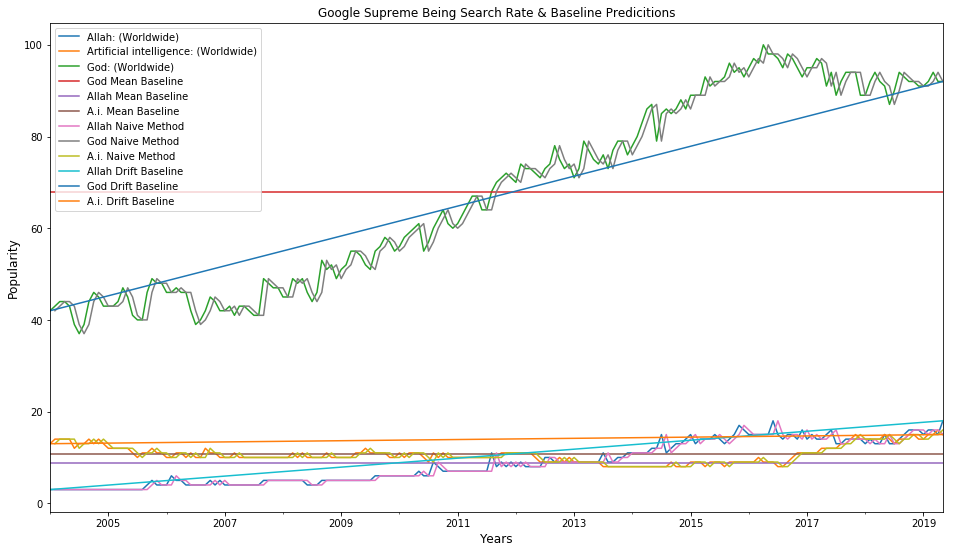

In [0]:
df.plot(figsize=(16,9));
plt.title('Google Supreme Being Search Rate & Baseline Predicitions');
plt.xlabel('Years', fontsize=12)
plt.ylabel('Popularity', fontsize=12);

In [0]:
df.head(20)

,Allah: (Worldwide),Artificial intelligence: (Worldwide),God: (Worldwide),God Mean Baseline,Allah Mean Baseline,A.i. Mean Baseline,Allah Naive Method,God Naive Method,A.i. Naive Method,Allah Drift Baseline,God Drift Baseline,A.i. Drift Baseline
Month,,,,,,,,,,,,
2004-01-01,3,13,42,68.0,8.767568,10.681081,NaN,NaN,NaN,3.000000,42.000000,13.000000
2004-02-01,3,14,43,68.0,8.767568,10.681081,3.0,42.0,13.0,3.081522,42.271739,13.010870
2004-03-01,3,14,44,68.0,8.767568,10.681081,3.0,43.0,14.0,3.163043,42.543478,13.021739
2004-04-01,3,14,44,68.0,8.767568,10.681081,3.0,44.0,14.0,3.244565,42.815217,13.032609
2004-05-01,3,14,43,68.0,8.767568,10.681081,3.0,44.0,14.0,3.326087,43.086957,13.043478
2004-06-01,3,12,39,68.0,8.767568,10.681081,3.0,43.0,14.0,3.407609,43.358696,13.054348
2004-07-01,3,13,37,68.0,8.767568,10.681081,3.0,39.0,12.0,3.489130,43.630435,13.065217
2004-08-01,3,13,39,68.0,8.767568,10.681081,3.0,37.0,13.0,3.570652,43.902174,13.076087
2004-09-01,3,14,44,68.0,8.767568,10.681081,3.0,39.0,13.0,3.652174,44.173913,13.086957


In [0]:
df2 = pd.DataFrame(df['Allah: (Worldwide)'])
df2.tail()

,Allah: (Worldwide)
Month,
2019-01-01,15
2019-02-01,16
2019-03-01,16
2019-04-01,15
2019-05-01,18


In [0]:
trainA = df2['2004':'2017']
testA = df2['2018':'2019']

In [0]:
trainA = trainA.reset_index().rename(columns={'Month': 'ds', "Allah: (Worldwide)": 'y'})
testA = testA.reset_index().rename(columns={'Month': 'ds', "Allah: (Worldwide)": 'y'})


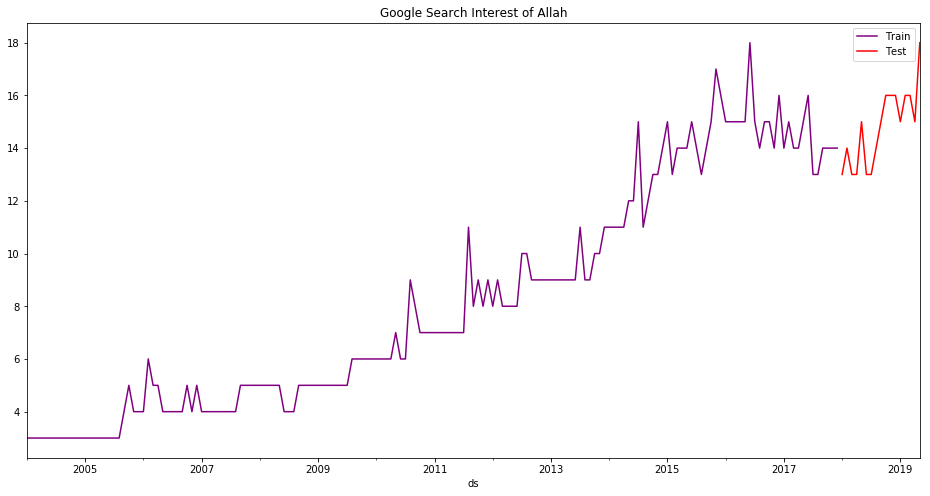

In [0]:
ax = trainA.plot(x='ds', y='y', color='purple', label='Train', figsize=(16,8))
testA.plot(x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Google Search Interest of Allah');

In [0]:
trainA['mean_baseline'] = trainA['y'].mean()
testA['mean_baseline']  = trainA['y'].mean()
print('Average daily ranking:', trainA['y'].mean())

Average daily ranking: 8.160714285714286


In [0]:
trainA['naive_baseline'] = trainA['y'].shift(1).bfill()
trainA_last_observation = trainA['naive_baseline'].iloc[-1]
testA['naive_baseline'] = trainA_last_observation

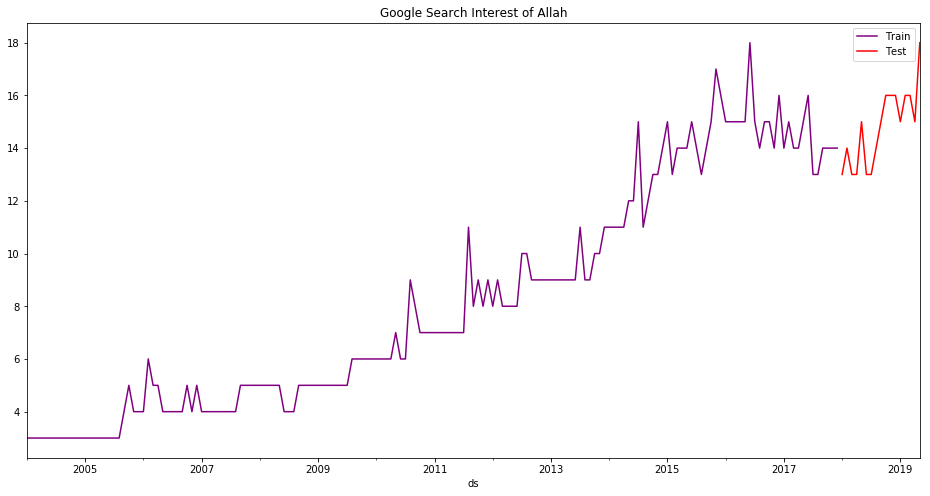

In [0]:
ax = trainA.plot(x='ds', y='y', color='purple', label='Train', figsize=(16,8))
testA.plot(x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Google Search Interest of Allah');

In [0]:
from sklearn.metrics import mean_absolute_error


In [0]:
trainA_mae = mean_absolute_error(trainA['y'], trainA['mean_baseline'])
testA_mae = mean_absolute_error(testA['y'], testA['mean_baseline'])
print('Train MAE, for mean baseline:', trainA_mae)
print('Test MAE, for mean baseline:', testA_mae)

Train MAE, for mean baseline: 3.685586734693877
Test MAE, for mean baseline: 6.603991596638655


In [0]:
trainA_mae = mean_absolute_error(trainA['y'], trainA['naive_baseline'])
testA_mae = mean_absolute_error(testA['y'], testA['naive_baseline'])
print('Train MAE, for naive baseline:', trainA_mae)
print('Test MAE, for naive baseline:', testA_mae)

Train MAE, for naive baseline: 0.5297619047619048
Test MAE, for naive baseline: 1.3529411764705883


In [0]:
from fbprophet import Prophet


In [0]:
Allah_model = Prophet(daily_seasonality=False)
Allah_model.fit(trainA)
trainA_forecast = Allah_model.predict(trainA)
testA_forecast = Allah_model.predict(testA)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [0]:
ax = trainA.plot(x='ds', y='y', color='blue', label='Train', figsize=(16,4))
testA.plot(x='ds', y='y', color='red', label='Test', ax=ax)
trainA_forecast.plot(x='ds', y='yhat', color='orange', 
                    label='Prophet forecast, train', ax=ax)
testA_forecast.plot(x='ds', y='yhat', color='black', 
                   label='Prophet forecast, test', ax=ax)
plt.title('Google Search Rank Prediction for Allah');

In [0]:
trainA_mae = mean_absolute_error(trainA['y'], trainA_forecast['yhat'])
testA_mae = mean_absolute_error(testA['y'], testA_forecast['yhat'])
print('Train MAE for Prophet (default params):', trainA_mae)
print('Test MAE for Prophet (default params):', testA_mae)

In [0]:
from fbprophet.diagnostics import cross_validation
df_cvA = cross_validation(Allah_model, initial='730 days', 
                         horizon='365 days', period='180 days')

In [0]:
df_cv.describe(exclude='number')

In [0]:
stop

In [0]:
from fbprophet import Prophet
m = Prophet()
m.fit(df2)

In [0]:
future = m.make_future_dataframe(periods=365)
future.tail()

In [0]:
forecast = m.predict(future)

In [0]:
#make predictive plot over matplot base
fig1 = m.plot(forecast);
plt.title('Allah on Google Worldwide & Predicition of Interest in Search');
plt.xlabel('Years', fontsize=12)
plt.ylabel('Interest Rank', fontsize=12);

In [0]:
figc = m.plot_components(forecast)

In [0]:
df3 = pd.DataFrame(df['God: (Worldwide)'])
df3.head()

In [0]:
traing = df3['2004':'2017']
testg =df3['2018':'2019']

In [0]:
traing = traing.reset_index()
testg  = testg.reset_index()

In [0]:
traing = traing.reset_index().rename(columns={'Month': 'ds', "God: (Worldwide)": 'y'})
testg = testg.reset_index().rename(columns={'Month': 'ds', "God: (Worldwide)": 'y'})

In [0]:
ax = traing.plot(x='ds', y='y', color='purple', label='Train', figsize=(16,8))
testg.plot(x='ds', y='y', color='red', label='Test', ax=ax)
plt.title('Google Search Interest of God');

In [0]:
traing['mean_baseline'] = traing['y'].mean()
testg['mean_baseline']  = traing['y'].mean()
print('Average daily ranking:', traing['y'].mean())

In [0]:
g = Prophet(week)
g.fit(df3)

In [0]:
futureg = g.make_future_dataframe(periods=365)
futureg.tail()

In [0]:
forecastg = g.predict(futureg)

In [0]:
fig2 = g.plot(forecastg);
plt.title('God on Google Worldwide & Predicition of Interest in Search');
plt.xlabel('Years', fontsize=12)
plt.ylabel('Interest Rank', fontsize=12);

In [0]:
figg = g.plot_components(forecastg)

In [0]:
df4 = pd.DataFrame(df['Artificial intelligence: (Worldwide)'])
df4.head()

In [0]:
traini = df4['2004':'2017']
testi =df4['2018':'2019']

In [0]:
traini = traini.reset_index()
testi  = testi.reset_index()

In [0]:
traini = traini.reset_index().rename(columns= {"Month":"ds", "Artificial intelligence: (Worldwide)": "y"})
testi = testi.reset_index().rename(columns = {'Month':'ds', 'Artificial intelligence: (Worldwide)': 'y'})

In [0]:
a = Prophet()
a.fit(df4)

In [0]:
futurea = a.make_future_dataframe(periods=365)
futurea.tail()

In [0]:
forecasta = a.predict(futureg)

In [0]:
fig3 = a.plot(forecasta);
plt.title('A.I. on Google Worldwide & Predicition of Interest in Search');
plt.xlabel('Years', fontsize=12)
plt.ylabel('Interest Rank', fontsize=12);

In [0]:
figa = a.plot_components(forecasta)